In [3]:
from rdkit import Chem

In [2]:
r1 = "[C:10](=[C:11](\[C:12]([H:14])([H:15])[H:16])[H:13])(\[C:17]([H:19])([H:20])[H:21])[H:18].[C:1]([C:2]([O:6][O:7][H:8])=[O:9])([H:3])([H:4])[H:5]"
p1 = "[C:10](=[C:11](\[C:12]([H:14])([H:15])[H:16])[H:13])(\[C:17]([H:19])([H:20])[H:21])[H:18].[C:1]([C:2](=[O:6])[O:9][O:7][H:8])([H:3])([H:4])[H:5]"


r2 = "[C:10](=[C:11](\[C:12]([H:14])([H:15])[H:16])[H:13])(\[C:17]([H:19])([H:20])[H:21])[H:18].[C:1]([C:2]([O:6][O:7][H:8])=[O:9])([H:3])([H:4])[H:5]"
p2 = "[C:1]([C@:2]([O:6][O:7][H:8])([O:9][H:18])/[C:10](=[C:11](/[C:12]([H:14])([H:15])[H:16])[H:13])[C:17]([H:19])([H:20])[H:21])([H:3])([H:4])[H:5]"

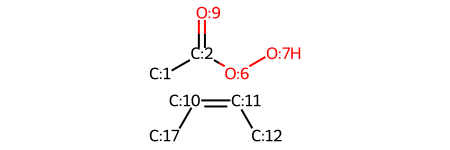

In [3]:
Chem.MolFromSmiles(r1)

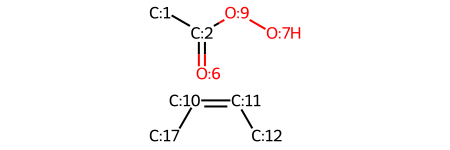

In [4]:
Chem.MolFromSmiles(p1)

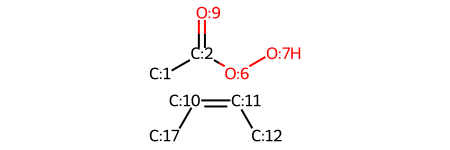

In [5]:
Chem.MolFromSmiles(r2)

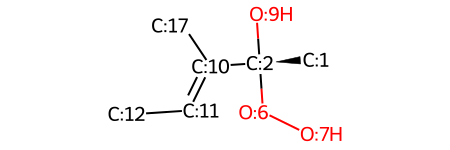

In [6]:
Chem.MolFromSmiles(p2)

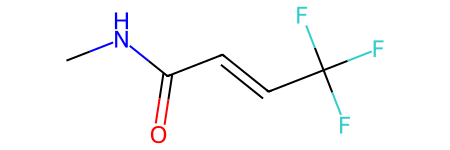

In [9]:


smiles = "CNC(=O)/C=C/C(F)(F)F"
Chem.MolFromSmiles(smiles)

In [11]:
mol = Chem.MolFromSmiles(smiles)
Chem.RemoveStereochemistry(mol) 

print(Chem.MolToSmiles(mol))

CNC(=O)C=CC(F)(F)F


In [1]:
with open('../data/zimmerman/zimmerman_reactions_am.txt', 'r') as f:
    reactions = f.readlines()
    
reactions = [r.split(' ')[1].strip() for r in reactions]
reactions

['[N+:1](=[B-:2](/[H:6])[H:7])(\\[H:8])[H:9].[N+:3](=[B-:4](/[H:11])[H:12])(\\[H:5])[H:10]>>[N+:1]([B-:2]([H:6])([H:7])[H:12])([B:4]([N:3]([H:5])[H:10])[H:11])([H:8])[H:9]',
 '[N+:1](=[B-:2](/[H:6])[H:7])(\\[H:8])[H:9].[N+:3](=[B-:4](/[H:11])[H:12])(\\[H:5])[H:10]>>[N+:1]([B-:2]([H:6])([H:7])[H:9])([B:4]([N:3]([H:5])[H:10])[H:11])([H:8])[H:12]',
 '[N+:1](=[B-:2](/[H:6])[H:7])(\\[H:8])[H:9].[N+:3](=[B-:4](/[H:11])[H:12])(\\[H:5])[H:10]>>[N+:1]([B-:2]([N:3]([B:4]([H:11])[H:12])[H:10])([H:6])[H:7])([H:5])([H:8])[H:9]',
 '[N+:1](=[B-:2](/[H:6])[H:7])(\\[H:8])[H:9].[N+:3](=[B-:4](/[H:11])[H:12])(\\[H:5])[H:10]>>[N+:1](=[B-:2](/[H:6])[H:7])(\\[H:9])[H:12].[N+:3](=[B-:4](/[H:8])[H:11])(\\[H:5])[H:10]',
 '[N+:1](=[B-:2](/[H:6])[H:7])(\\[H:8])[H:9].[N+:3](=[B-:4](/[H:11])[H:12])(\\[H:5])[H:10]>>[N+:1](=[B-:2](/[H:6])[H:7])(\\[H:5])[H:8].[N+:3](=[B-:4](/[H:11])[H:12])(\\[H:9])[H:10]',
 '[N+:1](=[B-:2](/[H:6])[H:7])(\\[H:8])[H:9].[N+:3](=[B-:4](/[H:11])[H:12])(\\[H:5])[H:10]>>[N+:1](=[B-:2](/[H:6

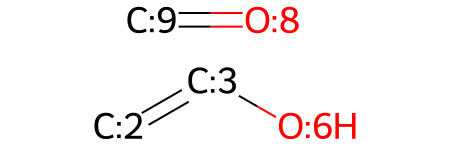

In [15]:
index = 20

Chem.MolFromSmiles(reactions[index].split('>>')[0])

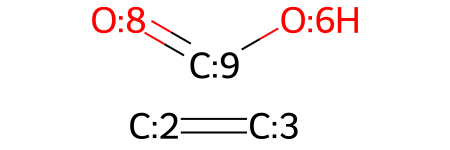

In [16]:
Chem.MolFromSmiles(reactions[index].split('>>')[1])